In [37]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__) # find the version number (should be 2.x+)

2.5.0


# **MODEL-1**

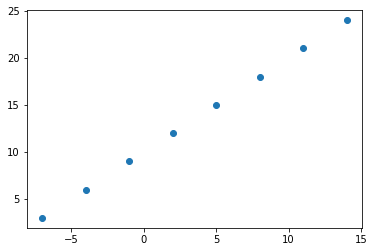

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [39]:
tf.random.set_seed(43)

#Create model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(5),
      tf.keras.layers.Dense(1)
])

#Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])
model.fit(X,y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 265ms/step - loss: 12.8751 - mae: 12.8751
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7448 - mae: 12.7448
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.6137 - mae: 12.6137
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.4818 - mae: 12.4818
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3489 - mae: 12.3489
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2147 - mae: 12.2147
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.0789 - mae: 12.0789
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9407 - mae: 11.9407
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8000 - mae: 11.8000
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6564 - mae: 11.6564
Epoch 11/100
1/1 [==============================] - 0s 9m

In [40]:
model.predict([14])

array([[25.22595]], dtype=float32)

# **model - 2**

In [41]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)
v =  X == y-10
v.any(), v.all()

(True, True)

In [42]:
X[:5], y[:5]

(array([-100,  -96,  -92,  -88,  -84]), array([-90, -86, -82, -78, -74]))

In [43]:
len(X), len(y)

(50, 50)

In [44]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

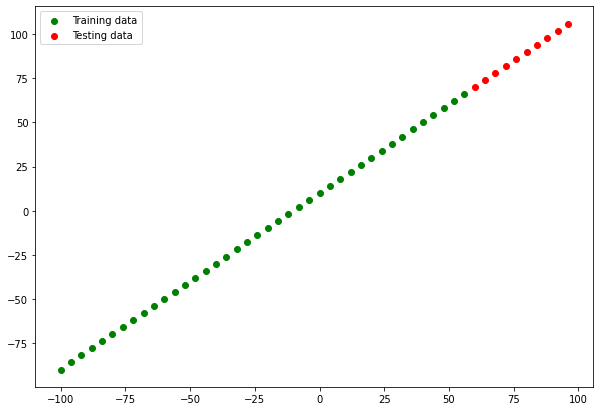

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c = 'g', label = 'Training data')
plt.scatter(X_test, y_test, c = 'r', label = 'Testing data')
plt.legend()

In [46]:
tf.random.set_seed(43)

#Create model
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(20),
      tf.keras.layers.Dense(1)
])

#Compile
model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])
model_2.fit(X_train,y_train, epochs = 200, verbose=0)


In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


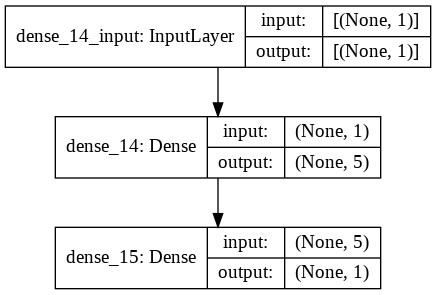

In [48]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [54]:

# Make predictions
y_preds = model_2.predict(X_test)

In [55]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

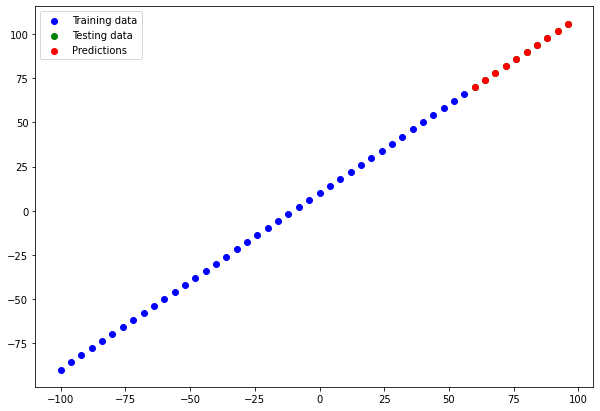

In [56]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [57]:
# Evaluate the model on the test set
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 0.0773 - mae: 0.0773


[0.077336885035038, 0.077336885035038]

In [59]:
model_2.predict([90]) #X == y-10

array([[99.90112]], dtype=float32)

In [61]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [65]:
y_preds = y_preds.squeeze()

In [66]:

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [69]:
mae(y_test, y_preds).numpy(), mse(y_test, y_preds).numpy()

(0.077336885, 0.006406158)

# Use below code for comparing models

model_results = 
                [
                 
                ["model_1", mae_1, mse_1],

                ["model_2", mae_2, mse_2],

                ["model_3", mae_3, mse_3]]

import pandas as pd

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

all_results

In [70]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [71]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [73]:
!pwd

/content


In [74]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_saved_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_saved_model.predict(X_test.squeeze())
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, y_preds.squeeze()).numpy()

True

# **Model_3**__Larger Example


In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [10]:
len(X_train), len(y_train)

(1070, 1070)

In [17]:
tf.random.set_seed(43)

#Create model
model_3= tf.keras.Sequential([
      tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(1)
])

#Compile
model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])
history = model_3.fit(X_train,y_train, epochs = 100, verbose=0)


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [22]:
insurance_model_loss, insurance_model_mae = model_3.evaluate(X_test, y_test)
insurance_model_loss, insurance_model_mae

9/9 [==============================] - 0s 2ms/step - loss: 2181.4065 - mae: 2181.4065


(2181.406494140625, 2181.406494140625)

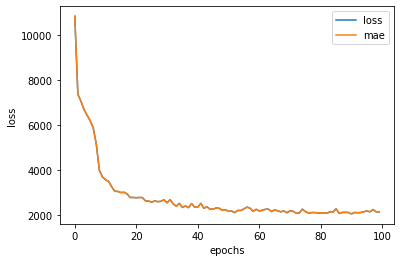

In [20]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# **Model_4-Preprocessing Insurance Model**

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [24]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [26]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [27]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [28]:
tf.random.set_seed(43)

#Create model
model_4= tf.keras.Sequential([
      tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
      tf.keras.layers.Dense(1)
])

#Compile
model_4.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])
history = model_4.fit(X_train_normal,y_train, epochs = 100, verbose=0)

In [31]:
# Evaulate 3rd model
insurance_model_2_loss, insurance_model_2_mae = model_4.evaluate(X_test_normal, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 1876.8402 - mae: 1876.8402


(1876.8402099609375, 1876.8402099609375)

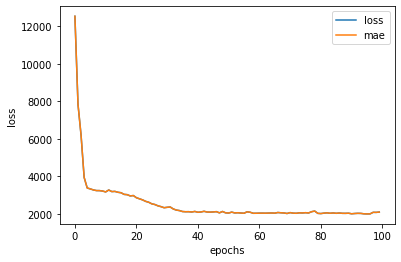

In [32]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");